## Serial Crystallography Introduction

<img src="SFX_intro.png" width="700" align="left"/>

## Sample choice

[3WUL](https://www.rcsb.org/structure/3WUL) is a protein structure in PDB.
The protein is hen's egg-white lysozyme (HEWL), a small enzyme commonly used as a test case for X-ray crystallography.

<img src="3wul.pdb1-500.jpg" width="300" align="left"/>

## Detector

The AGIPD detector, which is already in use at the SPB experiment, consists of 16 modules of 512×128 pixels each. Each module is further divided into 8 ASICs (application-specific integrated circuit).

<img src="AGIPD.png" width="300" align="left"/> <img src="agipd_geometry_14_1.png" width="420" align="right"/> 

## Simulation Demonstration

In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np

from SimEx import *

import matplotlib.colors as colors

initializing ocelot...



## Data path setup

In [2]:
data_path = './diffr_monolithic'

## Plot original diffraction pattern

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b516e80e4e0>)

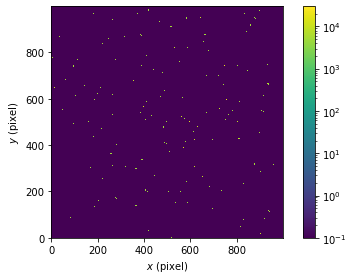

In [3]:
analyzer = DiffractionAnalysis(input_path=data_path,
                               pattern_indices=1,
                               poissonize=True
                              )
analyzer.plotPattern(logscale=True)

## Add random noise

In [10]:
rand_size = 5

with h5py.File(data_path+'.h5','r') as f:
    with h5py.File('noise.h5','w') as of:
        f.copy('params',of)
        for i in f['data']:
            data = f['data'][i]['data'][...]
            ran_y = np.random.randint(data.shape[0],size=rand_size)
            ran_x = np.random.randint(data.shape[1],size=rand_size)
            for y,x in zip(ran_y,ran_x):
                data[y,x] = np.random.randint(low=-1,high=2)*1e12
            grp = of.create_group("data/"+i)
            grp.create_dataset("data", data=data)

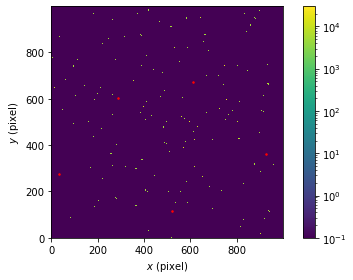

In [11]:
analyzer = DiffractionAnalysis(input_path=data_path,
                               pattern_indices=1,
                               poissonize=True
                              )
fig, ax= analyzer.plotPattern(logscale=True)
ax.plot(ran_x,ran_y,'ro',markersize=1.5)